In [9]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Reading the excel file
df = pd.read_excel('ElectiveSurgeryData.xlsx')
df.head()

,SurgDate,DOW,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
0,2022-10-10,Mon,38,45,60,63,65,70,73,73,73,80,84,89,94,98,100,104,106
1,2022-10-11,Tue,35,47,65,68,78,82,82,82,86,89,92,95,99,99,99,114,121
2,2022-10-12,Wed,26,43,54,62,72,72,72,74,87,94,96,101,102,102,106,114,126
3,2022-10-13,Thu,28,48,65,70,72,72,72,82,87,91,94,94,94,97,98,103,114
4,2022-10-14,Fri,31,40,50,50,50,54,62,68,71,73,73,73,78,83,87,94,106


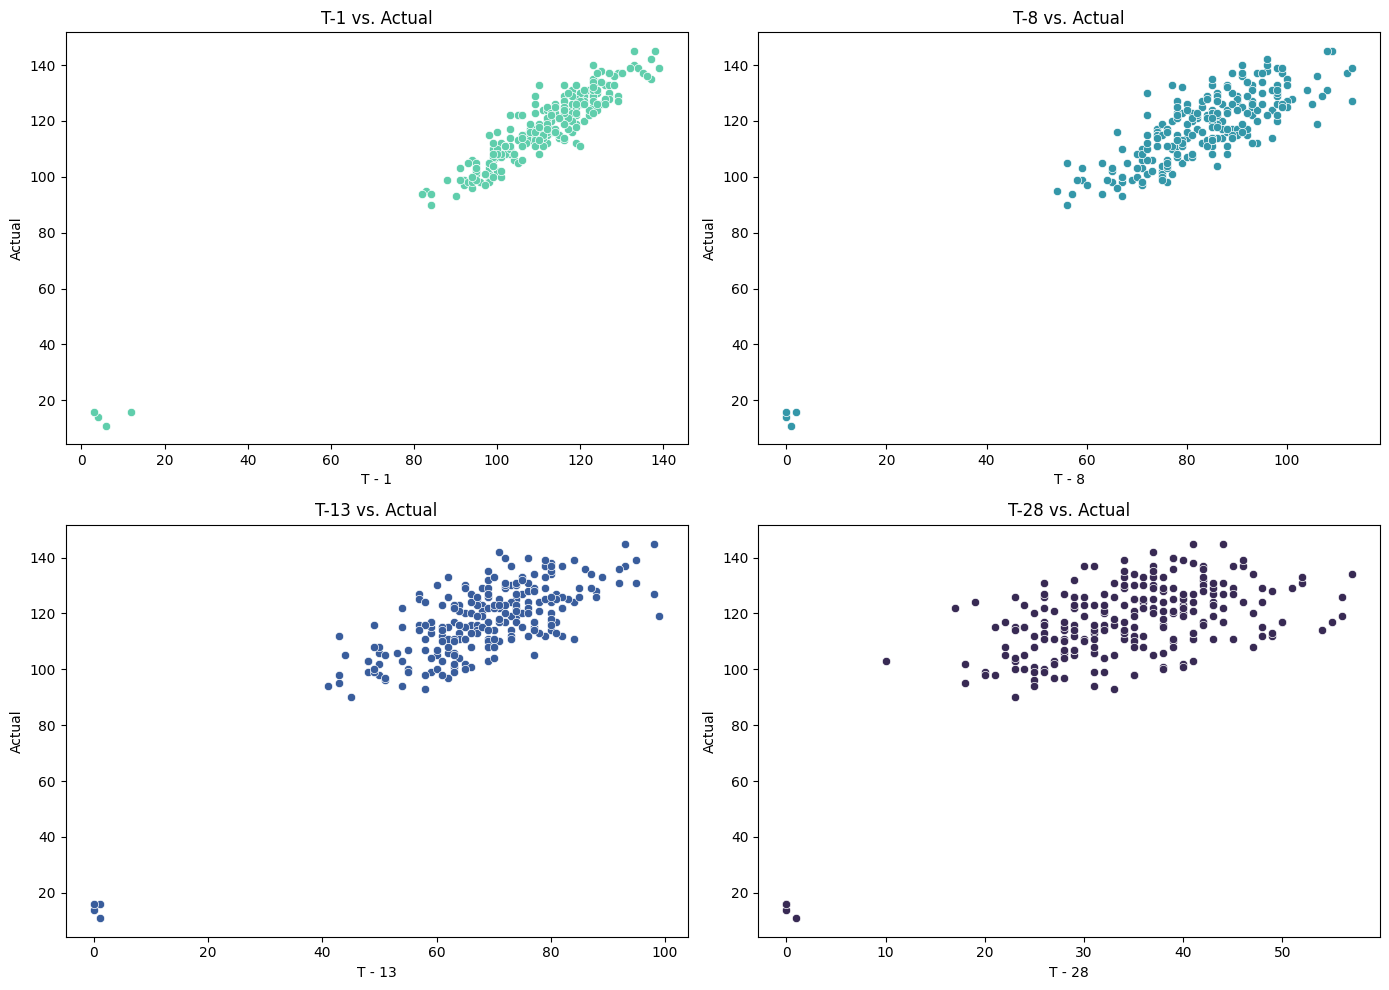

In [63]:
# Filtering the numerical columns from the dataset
num_cols = [col for col in df.columns if df[col].dtype == 'int64']
df_num = df[num_cols]

## Plotting the scatter plot b/w actual vs T-x values to analyse the trends b/w the two 
palette = sns.color_palette("mako_r", 4)
plt.figure(figsize=(14, 10))

# Subplot for T-1 and Actual
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='T - 1', y='Actual',color=palette[0])
plt.title('T-1 vs. Actual')

# Subplot for T-4 and Actual
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='T - 8', y='Actual',color=palette[1])
plt.title('T-8 vs. Actual')

# Subplot for T-15 and Actual
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='T - 13', y='Actual',color=palette[2])
plt.title('T-13 vs. Actual')

# Subplot for T-28 and Actual
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='T - 28', y='Actual',color=palette[3])
plt.title('T-28 vs. Actual')
plt.savefig("scatter_plot.png", dpi=300, bbox_inches='tight')
# Adjust layout for better spacing
plt.tight_layout()
plt.show()

**Analysis**
From the scatterplot above, we can observe linear relationships b/w Actual vs T-x. Saying that, the coorelation decreases as x increases

We can also verify this quantitatively by using correlation matrix. The correlation plot depicts the same trend as well, as x increases correlation decreases. This is intuitive as well T-1 day will capture maximum information on surgeries to be performed next day

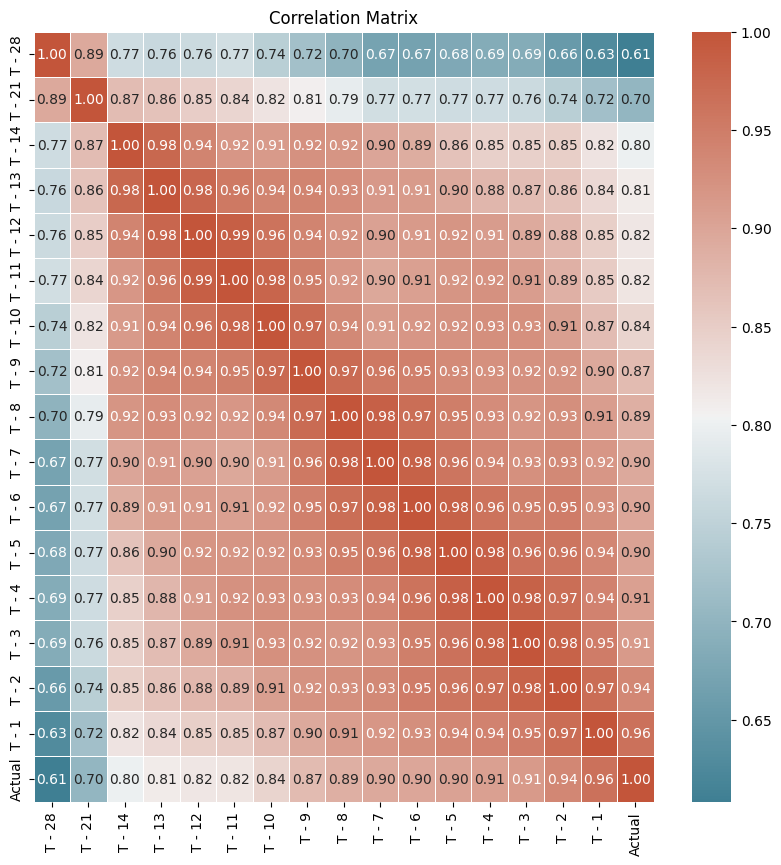

In [23]:
## Plotting the 
correlation_matrix = df_num.corr()

# Set the size of the plot
plt.figure(figsize=(10, 10))
custom_palette = sns.diverging_palette(220, 20, n=256)

# Create a heatmap of the correlation matrix with the custom color palette
sns.heatmap(correlation_matrix, annot=True, cmap=custom_palette, fmt=".2f", linewidths=0.5)

# Set plot title

# Set plot title
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
plt.savefig('corr.png')

## Regression Analysis

The predictive power of each predictor can be judged by doing regression analysis on them as well. The highly predictive predictor will be able to explain more variance in the actual surgeries performed.

**Experiments Done**

- T - 1  vs Actual -> R2 = 93 % 
- T - 5  vs Actual -> R2 = 81 % 
- T - 28 vs Actual -> R2 = 37 % 

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the columns for multiple regression analysis
X = df['T - 1']
y = df['Actual']  # Dependent variable

# Adding a constant to the model
X = sm.add_constant(X)
# Building the OLS model
m1 = sm.OLS(y, X).fit()

# Getting the summary of the regression
m1_summary = m1.summary()
print(m1_summary)

                            OLS Regression Results                            
Dep. Variable:                 Actual   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     3210.
Date:                Sat, 13 Jan 2024   Prob (F-statistic):          1.57e-140
Time:                        19:57:18   Log-Likelihood:                -711.38
No. Observations:                 241   AIC:                             1427.
Df Residuals:                     239   BIC:                             1434.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1827      1.881      5.945      0.0

In [35]:
X = df['T - 5']
y = df['Actual']  # Dependent variable

# Adding a constant to the model
X = sm.add_constant(X)
# Building the OLS model
m2 = sm.OLS(y, X).fit()

# Getting the summary of the regression
m2_summary = m2.summary()
print(m2_summary)

                            OLS Regression Results                            
Dep. Variable:                 Actual   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     1054.
Date:                Sat, 13 Jan 2024   Prob (F-statistic):           1.43e-89
Time:                        19:58:02   Log-Likelihood:                -829.63
No. Observations:                 241   AIC:                             1663.
Df Residuals:                     239   BIC:                             1670.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.0000      2.645     12.097      0.0

In [37]:
X = df['T - 28']
y = df['Actual']  # Dependent variable

# Adding a constant to the model
X = sm.add_constant(X)
# Building the OLS model
m3 = sm.OLS(y, X).fit()

# Getting the summary of the regression
m3_summary = m3.summary()
print(m3_summary)

                            OLS Regression Results                            
Dep. Variable:                 Actual   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     140.4
Date:                Sat, 13 Jan 2024   Prob (F-statistic):           8.81e-26
Time:                        19:58:38   Log-Likelihood:                -977.35
No. Observations:                 241   AIC:                             1959.
Df Residuals:                     239   BIC:                             1966.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         77.2438      3.425     22.556      0.0

In [74]:
## Extracting Average weekly distribution of the surgeries performed
df.groupby('DOW')['Actual'].mean()

DOW
Fri    105.612245
Mon    116.255319
Thu    124.083333
Tue    119.081633
Wed    117.041667
Name: Actual, dtype: float64

In [41]:
df.head()

,SurgDate,DOW,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
0,2022-10-10,Mon,38,45,60,63,65,70,73,73,73,80,84,89,94,98,100,104,106
1,2022-10-11,Tue,35,47,65,68,78,82,82,82,86,89,92,95,99,99,99,114,121
2,2022-10-12,Wed,26,43,54,62,72,72,72,74,87,94,96,101,102,102,106,114,126
3,2022-10-13,Thu,28,48,65,70,72,72,72,82,87,91,94,94,94,97,98,103,114
4,2022-10-14,Fri,31,40,50,50,50,54,62,68,71,73,73,73,78,83,87,94,106


In [64]:
df.keys()

Index(['SurgDate', 'DOW', 'T - 28', 'T - 21', 'T - 14', 'T - 13', 'T - 12',
       'T - 11', 'T - 10', 'T - 9', 'T - 8', 'T - 7', 'T - 6', 'T - 5',
       'T - 4', 'T - 3', 'T - 2', 'T - 1', 'Actual'],
      dtype='object')

**Final Model**

Using a linear regression model with predictors upto T-7 , so that a week's notice can be given to VUMC

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the columns for multiple regression analysis
X = df[['T - 28', 'T - 21', 'T - 14', 'T - 13', 'T - 12','T - 11', 'T - 10', 'T - 9', 'T - 8', 'T - 7']]
y = df['Actual']  # Dependent variable

# Adding a constant to the model
X = sm.add_constant(X)
# Building the OLS model
m4 = sm.OLS(y, X).fit()

# Getting the summary of the regression
m4_summary = m4.summary()
print(m4_summary)

                            OLS Regression Results                            
Dep. Variable:                 Actual   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     100.7
Date:                Sat, 13 Jan 2024   Prob (F-statistic):           3.21e-78
Time:                        21:03:42   Log-Likelihood:                -830.26
No. Observations:                 241   AIC:                             1683.
Df Residuals:                     230   BIC:                             1721.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.0812      2.764     11.247      0.0

In [67]:
y_pred = m4.predict(X)

In [68]:
df['pred'] = y_pred

In [70]:
df['pred'] = df['pred'].astype('int64')

In [73]:
df.to_excel('final_ElectiveSurgeryData.xlsx')